<a href="https://colab.research.google.com/github/HeavyCrow1203/Analysis-Of-Real-Madrid-Performance/blob/main/Real_Madrid_Performance_season_2023_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analisis Performa Real Madrid Pada Musim 2023-2024 Di Berbagai Kompetisi**

Musim 2023-2024 merupakan salah satu musim terbaik bagi Real Madrid. Los Blancos berhasil meraih 3 trofi dibawah kepelatihan Carlo Ancelotti. Trofi pertama yang diraih adalah Supercopa De Espana. Kemudian Klub meraih trofi la liga ke-36 dan Mereka berhasil melengkapi 3 trofi dengan memenangkan Trofi Liga Champions UEFA ke-15 di London. Namun Copa Del Rey adalah satu-satunya trofi yang gagal diraih. Raihan kesuksesan tersebut kemudian dilakukan analisis data dengan tujuan untuk menganalisis performa real madrid di berbagai kompetisi pada musim 2023-2024.

Sumber Dataset : Kaggle dan TransferMarket

Info Data :
1. Time : Waktu Pertandingan
2. Competition : Kompetisi yang dilakoni Real Madrid
3. Round : Tahapan atau babak pertandingan dalam suatu kompetisi
4. Day : Tanggal Pertandingan
5. Venue : Lokasi Pertandingan
6. Result : Hasil Pertandingan
7. GF (Goals For) : Jumlah Gol yang diciptakan
8. GA (Goals Againts) : Jumlah Gol Kemasukan
9. Opponent : Lawan Pertandingan dari Real Madrid
10. Possession : Penguasaan Bola
11. Attendance2 : Jumlah Penonton di Stadion
12. Captain : Kapten yang memimpin tim pada saat pertandingan
13. Formation : Formasi yang digunakan
14. Year : Tahun diadakannya pertandingan
15. Month : Bulan diadakannya pertandingan

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data
df = pd.read_csv('/content/drive/MyDrive/DA/Real_Madrid_Season_2023_2024.csv')
df.head()

,Time,Competition,Round,Day,Venue,Result,GF,GA,Opponent,Possession,Attendance2,Captain,Formation,Year,Month
0,21:30:00,La Liga,Matchweek 1,12,Away,W,2,0,Athletic Club,54,48927,Dani Carvajal,4-1-2-1-2,2023,August
1,19:30:00,La Liga,Matchweek 2,19,Away,W,3,1,Almeria,57,17561,Dani Carvajal,4-3-1-2,2023,August
2,21:30:00,La Liga,Matchweek 3,25,Away,W,1,0,Celta Vigo,63,23057,Dani Carvajal,4-1-2-1-2,2023,August
3,16:15:00,La Liga,Matchweek 4,2,Home,W,2,1,Getafe,76,66747,Luka Modric,4-3-1-2,2023,September
4,21:00:00,La Liga,Matchweek 5,17,Home,W,2,1,Real Sociedad,52,70092,Dani Carvajal,4-1-2-1-2,2023,September


In [41]:
data = df['Captain'].value_counts()
import plotly.express as px
fig = px.pie(data, values=data.values, names=data.index, title='Real Madrid Captains Based on Match Played')
fig.show()

In [3]:
# info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Time         55 non-null     object
 1   Competition  55 non-null     object
 2   Round        55 non-null     object
 3   Day          55 non-null     int64 
 4   Venue        55 non-null     object
 5   Result       55 non-null     object
 6   GF           55 non-null     int64 
 7   GA           55 non-null     int64 
 8   Opponent     55 non-null     object
 9   Possession   55 non-null     int64 
 10  Attendance2  55 non-null     int64 
 11  Captain      55 non-null     object
 12  Formation    55 non-null     object
 13  Year         55 non-null     int64 
 14  Month        55 non-null     object
dtypes: int64(6), object(9)
memory usage: 6.6+ KB


In [4]:
# deskripsi data
df.describe()

,Day,GF,GA,Possession,Attendance2,Year
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,15.181818,2.345455,0.909091,57.890909,53380.818182,2023.563636
std,8.991953,1.294120,1.076220,9.767051,23437.140736,0.500505
min,1.000000,0.000000,0.000000,33.000000,10000.000000,2023.000000
25%,8.000000,1.000000,0.000000,51.500000,27410.000000,2023.000000
50%,15.000000,2.000000,1.000000,58.000000,66747.000000,2024.000000
75%,22.500000,3.000000,1.000000,63.000000,72822.500000,2024.000000
max,31.000000,5.000000,4.000000,78.000000,86212.000000,2024.000000


In [5]:
# mencari nilai kosong
df.isna().sum()

,0
Time,0
Competition,0
Round,0
Day,0
Venue,0
Result,0
GF,0
GA,0
Opponent,0
Possession,0


In [6]:
# mencari duplikasi data
df.duplicated().sum()

np.int64(0)

### Exploratory Data Analysis


1. Statistik Kemenangan dan Kekalahan


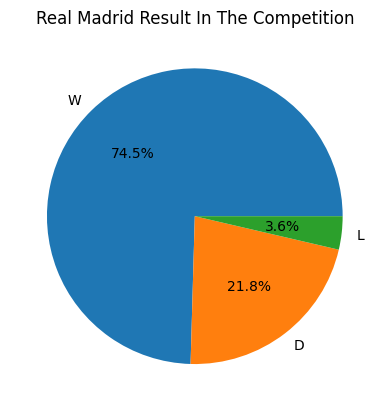

In [7]:
df1 = df['Result'].value_counts()
fig, ax = plt.subplots()
ax.pie(df1, labels=df1.index, autopct='%1.1f%%')
ax.set_title('Real Madrid Result In The Competition')
plt.show()



> Persentase kemenangan madrid pada musim 2023-2024 sebesar 74,5%. Menunjukkan dominasi real madrid begitu tinggi dan menandakan konsistensi mereka dengan hasil kekalahan hanya 3,6%



In [8]:
df2 = df['Result'].groupby(df['Competition']).value_counts().reset_index(name='count')
df2

,Competition,Result,count
0,Copa del Rey,L,1
1,Copa del Rey,W,1
2,La Liga,W,29
3,La Liga,D,8
4,La Liga,L,1
5,Supercopa de Espana,W,2
6,UEFA Champions League,W,9
7,UEFA Champions League,D,4


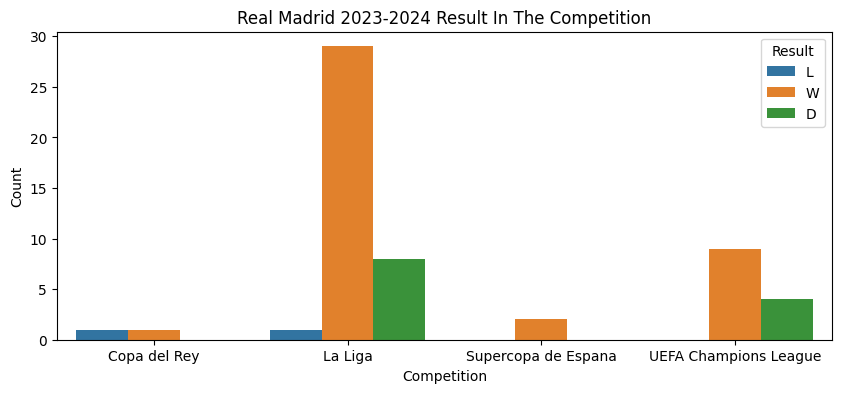

In [9]:
plt.figure(figsize=(10,4))
sns.barplot(x='Competition', y='count', hue='Result', data=df2)
plt.title('Real Madrid 2023-2024 Result In The Competition')
plt.xlabel('Competition')
plt.ylabel('Count')
plt.legend(title='Result')
plt.show()



> - Real Madrid begitu mendominasi di La Liga 2023-2024 dan hanya mengalami sekali kekalahan
- Real Madrid tidak terkalahkan saat bermain di Supercopa De Espana dan UEFA Champions League musim 2023-2024
- Di ajang Copa Del Rey, Real Madrid meraih satu kali kemenangan dan satu kali kekalahan
- Real Madrid bisa memenangkan semua Laga di Supercopa De Espana









In [10]:
# mencari lawan yang mengalahkan Real Madrid
df[df['Result'] == 'L']

,Time,Competition,Round,Day,Venue,Result,GF,GA,Opponent,Possession,Attendance2,Captain,Formation,Year,Month
6,21:00:00,La Liga,Matchweek 6,24,Away,L,1,3,Atletico Madrid,63,69082,Luka Modric,4-1-2-1-2,2023,September
28,21:30:00,Copa del Rey,Round of 16,18,Away,L,2,4,Atletico Madrid,59,67623,Nacho,4-3-1-2,2024,January




> - Atletico Madrid merupakan satu-satunya tim yang mengalahkan Real Madrid
- Atletico Madrid mengalahkan Real Madrid pada 2 kompetisi yang berbeda
- Pada Matchday 6 La Liga, Real Madrid kalah 1-3 dari Atletico Madrid
- Di Ajang Copa Del Rey, Real Madrid kalah 2-4 dari Atletico Madrid pada babak 16 besar sehingga Real Madrid tersingkir lebih cepat dari ajang tersebut
- Real Madrid menderita 2 kekalahan pada venue yang sama yaitu di kandang Atletico Madrid



In [11]:
# menghitung win rate real madrid di semua kompetisi
total_matches = df.groupby('Competition').size()
win_matches = df[df['Result'] == 'W'].groupby('Competition').size()
win_rate = (win_matches / total_matches) * 100
win_rate_combined = win_rate.reset_index(name='Win Rate').merge(total_matches.reset_index(name='Total Match'), on='Competition')
win_rate_combined.reset_index(drop=True)

,Competition,Win Rate,Total Match
0,Copa del Rey,50.000000,2
1,La Liga,76.315789,38
2,Supercopa de Espana,100.000000,2
3,UEFA Champions League,69.230769,13


In [12]:
# Jumlah pertandingan per kompetisi
df_match = df['Competition'].value_counts().reset_index()
df_match.columns = ['Competition', 'Total Match']

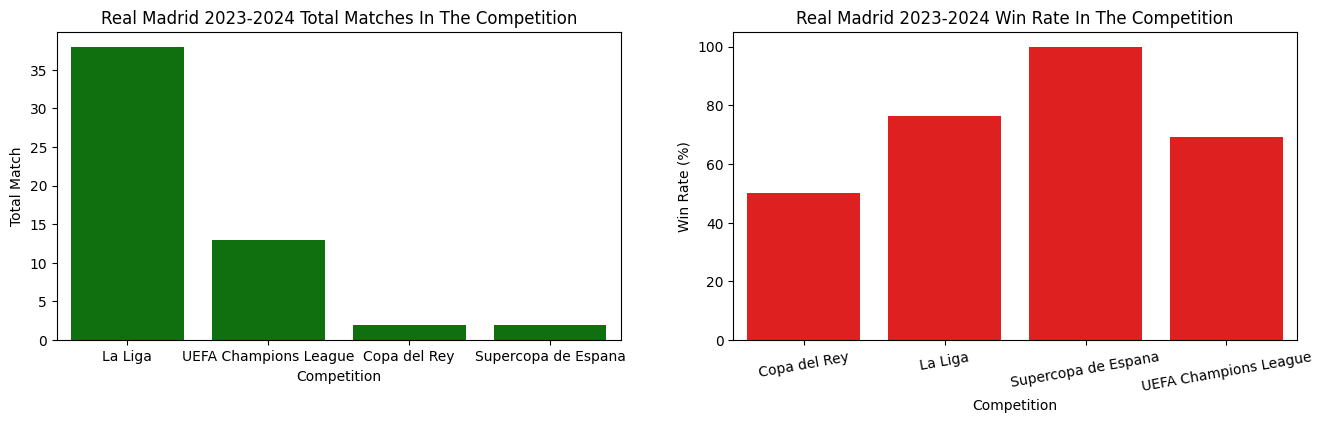

In [13]:
fig, ax = plt.subplots(1,2, figsize=(16,4))

# grafik 1 : rata-rata gol yang diciptakan
ax[0] = sns.barplot(y='Total Match', x='Competition', data=df_match, ax=ax[0], color='green')
ax[0].set_ylabel('Total Match')
ax[0].set_xlabel('Competition')
ax[0].set_title('Real Madrid 2023-2024 Total Matches In The Competition')

# grafik 2 : rata-rata gol yang kebobolan
ax[1] = sns.barplot(y='Win Rate', x='Competition', data=win_rate_combined, ax=ax[1], color='red')
ax[1].set_xlabel('Competition')
ax[1].set_ylabel('Win Rate (%)')
ax[1].set_title('Real Madrid 2023-2024 Win Rate In The Competition')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=10)

plt.show()

- Real Madrid mencatatkan win rate 100% di ajang Supercopa de Espana. Artinya mereka memenangi semua pertandingan dan tampil konsisten dalam format turnamen singkat
- Di Kompetisi La Liga, Real Madrid menorehkan win rate 76,3% menunjukkan dominasi dan konsistensi mereka dalam mengarungi kompetisi liga
- Meskipun win rate Madrid di Liga Champions UEFA lebih rendah dari La Liga, Performa Madrid boleh dibilang sangat baik karena bertemu lawan yang lebih kuat
- Real Madrid hanya memiliki win rate 50% dalam 2 pertandingan di ajang Copa Del Rey, menandakan mereka juga harus melakukan perbaikan bahkan tersingkir lebih cepat di ajang tersebut



2. Rata-rata gol yang dicetak dan gol kebobolan

In [14]:
Goals_For = df['GF'].mean()
Goals_Against = df['GA'].mean()
Total_GF = df['GF'].sum()
Total_GA = df['GA'].sum()
Total_Match = df.shape[0]
print(f'Total Pertandingan: {Total_Match}')
print(f'\nTotal Gol yang dicetak: {Total_GF}')
print(f'Rata-rata Gol Memasukkan: {Goals_For}')
print(f'\nTotal Gol yang kebobolan: {Total_GA}')
print(f'Rata-rata Gol Kebobolan: {Goals_Against}')

Total Pertandingan: 55

Total Gol yang dicetak: 129
Rata-rata Gol Memasukkan: 2.3454545454545452

Total Gol yang kebobolan: 50
Rata-rata Gol Kebobolan: 0.9090909090909091


- Real Madrid telah memainkan 55 pertandingan di semua kompetisi
- Real Madrid menciptakan 129 gol dari 55 pertandingan dengan rasio gol 2,34. Artinya Madrid mampu mencetak rata-rata 2 gol dalam 1 pertandingan
- Real Madrid juga menderita 50 kali kebobolan dari 55 pertandingan dengan rasio kebobolan 0,90. Artinya Lawan mampu mencetak rata-rata 1 gol saat melawan Real Madrid

In [15]:
# Total Gol yang diciptakan dan gol kebobolan disetiap kompetisi
df_gf = df.groupby('Competition')['GF'].sum().reset_index(name='Goals For')
df_ga = df.groupby('Competition')['GA'].sum().reset_index(name='Goals Against')

# Menggabungkan semua dataframe
df_combined = df_match.merge(df_gf, on='Competition').merge(df_ga, on='Competition')

print(df_combined)

             Competition  Total Match  Goals For  Goals Against
0                La Liga           38         87             26
1  UEFA Champions League           13         28             15
2           Copa del Rey            2          5              5
3    Supercopa de Espana            2          9              4


In [16]:
# rata-rata gol yang diciptakan disemua kompetisi
mean_gf = df.groupby('Competition')['GF'].mean().reset_index(name='Mean Goals For')
mean_ga = df.groupby('Competition')['GA'].mean().reset_index(name='Mean Goals Against')
mean_combined = df_match.merge(mean_gf, on='Competition').merge(mean_ga, on='Competition')
mean_combined

,Competition,Total Match,Mean Goals For,Mean Goals Against
0,La Liga,38,2.289474,0.684211
1,UEFA Champions League,13,2.153846,1.153846
2,Copa del Rey,2,2.500000,2.500000
3,Supercopa de Espana,2,4.500000,2.000000


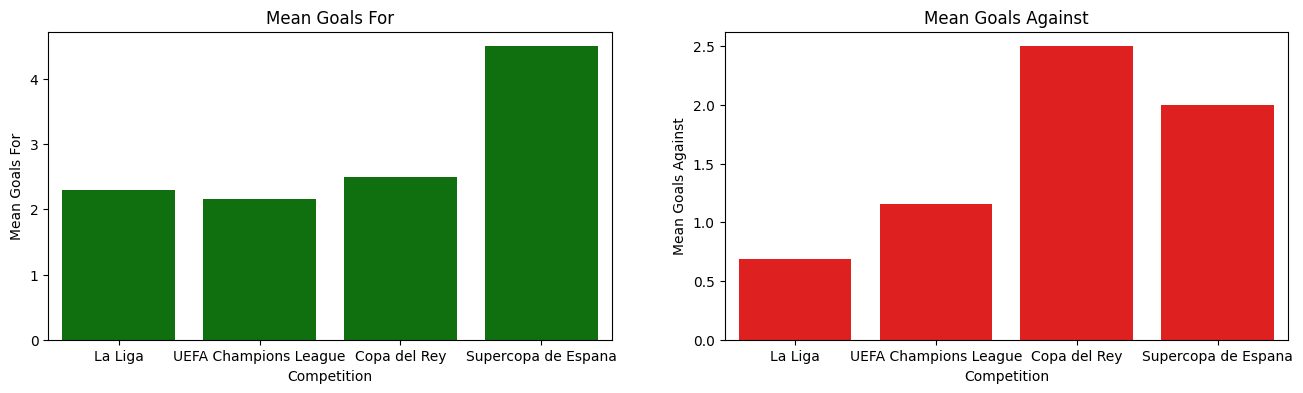

In [17]:
fig, ax = plt.subplots(1,2, figsize=(16,4))

# grafik 1 : rata-rata gol yang diciptakan
ax[0] = sns.barplot(x='Competition', y='Mean Goals For', data=mean_combined, ax=ax[0], color='green')
ax[0].set_title('Mean Goals For')
ax[0].set_xlabel('Competition')
ax[0].set_ylabel('Mean Goals For')

# grafik 2 : rata-rata gol yang kebobolan
ax[1] = sns.barplot(x='Competition', y='Mean Goals Against', data=mean_combined, ax=ax[1], color='red')
ax[1].set_title('Mean Goals Against')
ax[1].set_xlabel('Competition')
ax[1].set_ylabel('Mean Goals Against')

plt.show()

- Rasio gol tertinggi Real Madrid terjadi saat bertanding di Supercopa de Espana. Ini mengindikasikan Madrid mampu mencetak minimal 4 gol hanya dalam 2 pertandingan
- Namun rasio kebobolan tertinggi terjadi saat berlaga di Copa Del rey, menandakan bahwa pertahanan Real Madrid sangat rentan terhadap serangan lawan.

3. Performa Laga Home, Away, dan tempat netral

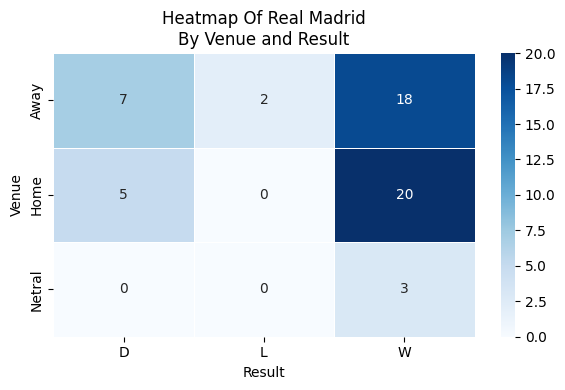

In [18]:
pivot = pd.pivot_table(df, values='Day', index='Venue', columns='Result', aggfunc='count', fill_value=0)

# Menampilkan heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(pivot, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Heatmap Of Real Madrid\nBy Venue and Result')
plt.ylabel('Venue')
plt.xlabel('Result')
plt.tight_layout()
plt.show()

- Real Madrid mampu memenangkan 18 pertandingan, 7 kali seri dan hanya kalah 2 kali dalam laga away. ini mengindikasikan real madrid mampu bermain konsisten meskipun bermain di kandang lawan
- Ketika bermain di kandang, madrid sanggup menang 20 kali dan seri 5 kali serta tidak terkalahkan.
- Real Madrid memenangkan semua laga ketika laga dimainkan di tempat netral
- Menunjukkan konsistensi permainan real madrid ketika bermain di berbagai venue

4. Formasi yang paling sering digunakan

In [19]:
df4 = df['Formation'].value_counts()

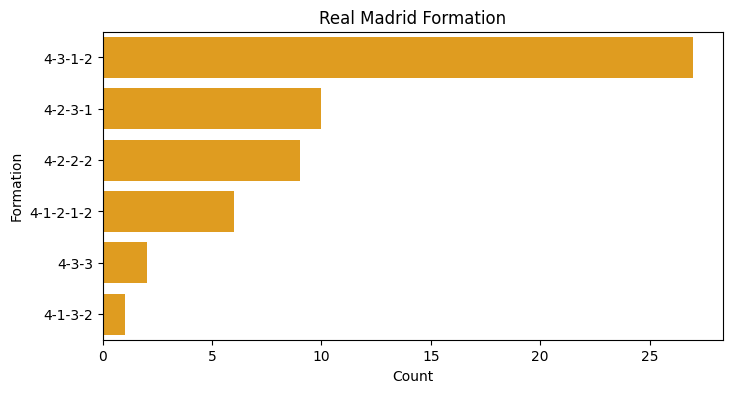

In [20]:
plt.figure(figsize=(8,4))
sns.barplot(y=df4.index, x=df4.values, color='orange')
plt.title('Real Madrid Formation')
plt.ylabel('Formation')
plt.xlabel('Count')
plt.show()

- Formasi 4-3-1-2 menjadi formasi yang paling sering digunakan pelatih Madrid, Carlo Ancelotti
- Formasi 4-3-1-2 menunjukkan real madrid bertanding menggunakan 2 striker dengan 1 gelandang serang sebagai false nine atau penyerang bayangan
- Ancelotti juga pernah menurunkan formasi 4-2-3-1 dengan 1 striker tunggal meskipun tidak sesering 4-3-1-2

In [21]:
result_formation = df['Result'].groupby(df['Formation']).value_counts()
result_formation

Formation  Result
4-1-2-1-2  W          4
           D          1
           L          1
4-1-3-2    W          1
4-2-2-2    W          8
           D          1
4-2-3-1    D          5
           W          5
4-3-1-2    W         21
           D          5
           L          1
4-3-3      W          2
Name: count, dtype: int64

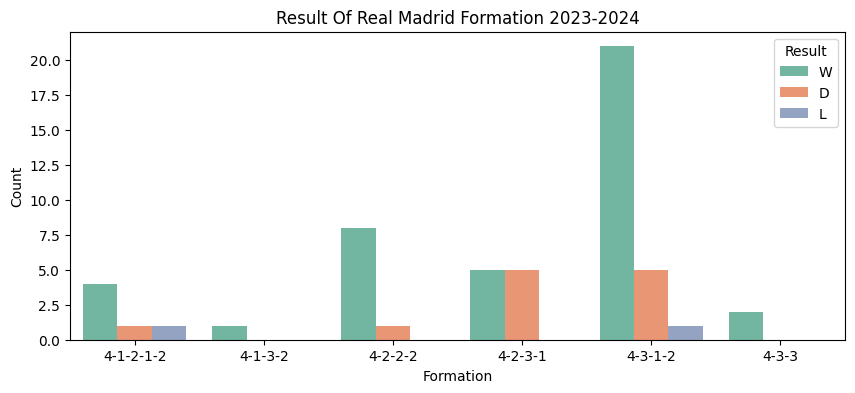

In [22]:
plt.figure(figsize=(10,4))
sns.barplot(x=result_formation.index.get_level_values(0), y=result_formation.values, hue=result_formation.index.get_level_values(1), palette='Set2')
plt.title('Result Of Real Madrid Formation 2023-2024')
plt.xlabel('Formation')
plt.ylabel('Count')
plt.show()

- Berdasarkan statistik, formasi 4-3-1-2 merupakan formasi terbaik real madrid dengan jumlah kemenangan tertinggi dan paling sering digunakan
- Formasi lainnya seperti 4-2-3-1 memberikan fleksibilitas namun tidak efektif seperti 4-3-1-2 dalam menghasilkan kemenangan
- Konsistensi real madrid cenderung meningkat seiring dengan formasi yang sudah digunakan dan cenderung stabil

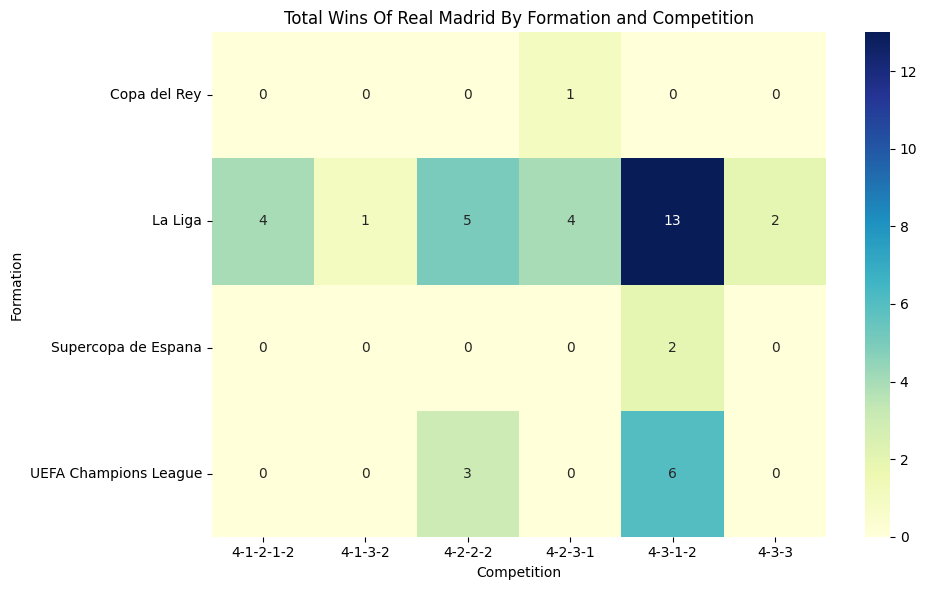

In [23]:
# Membuat pivot table untuk heatmap: Formasi vs Kompetisi dengan jumlah kemenangan
heatmap_data = df[df['Result'] == 'W'].pivot_table(index='Competition', columns='Formation', aggfunc='size', fill_value=0)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Total Wins Of Real Madrid By Formation and Competition')
plt.xlabel('Competition')
plt.ylabel('Formation')
plt.tight_layout()
plt.show()

- Formasi 4-3-1-2 menghasilkan paling banyak kemenangan di semua kompetisi
- Di La Liga, hampir semua formasi pernah dipakai dan jumlah kemenangan yang variatif, menandakan madrid sangat fleksibel dan adaptif di liga
- Di Liga Champions Eropa, Sebagian besar kemenangan diraih ketika bermain dengan formasi 4-3-1-2 maupun 4-2-2-2
- Dengan kemenangan terbanyak, maka formasi 4-3-1-2 paling sering dimainkan oleh real madrid
- Real Madrid juga memiliki formasi alternatif seperti 4-2-2-2 maupun 4-2-3-1 tergantung dari strategi lawan dan situasi pertandingan

5. Tren Performa tim

In [24]:
df.columns

Index(['Time', 'Competition', 'Round', 'Day', 'Venue', 'Result', 'GF', 'GA',
       'Opponent', 'Possession', 'Attendance2', 'Captain', 'Formation', 'Year',
       'Month'],
      dtype='object')

In [25]:
# Mengubah tipe string dari Month ke tipe int
df['Month_Num'] = pd.to_datetime(df['Month'], format='%B').dt.month

# Membuat kolom date dengan format yyyy-mm-dd
df['Date'] = pd.to_datetime({
    'year': df['Year'],
    'month': df['Month_Num'],
    'day': df['Day']
}).dt.strftime('%Y-%m-%d')

df_result = df[['Date', 'Result']]
df_result

,Date,Result
0,2023-08-12,W
1,2023-08-19,W
2,2023-08-25,W
3,2023-09-02,W
4,2023-09-17,W
5,2023-09-20,W
6,2023-09-24,L
7,2023-09-27,W
8,2023-09-30,W
9,2023-10-03,W


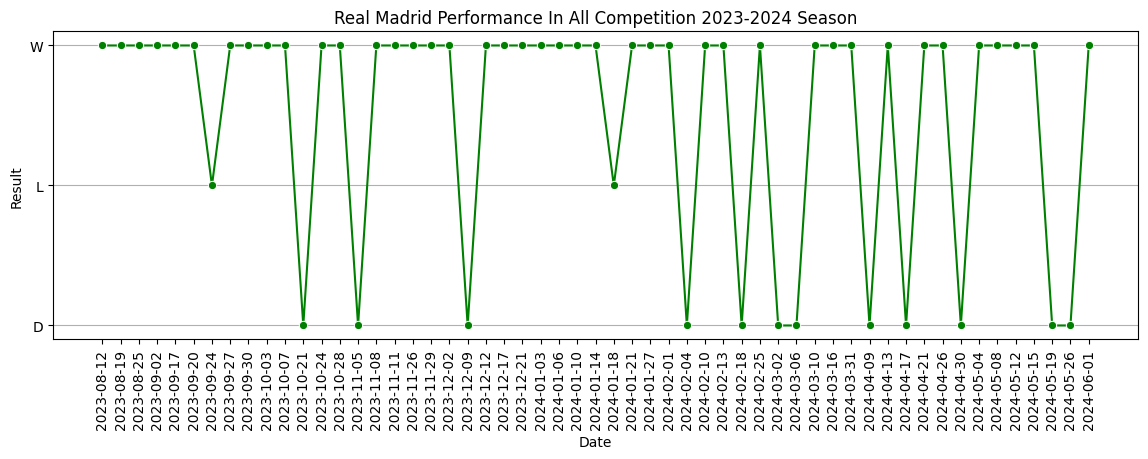

In [26]:
plt.figure(figsize=(14,4))
sns.lineplot(data=df_result, x='Date', y='Result', marker='o', color='green')
plt.title('Real Madrid Performance In All Competition 2023-2024 Season')
plt.xlabel('Date')
plt.ylabel('Result')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

- Performa Real Madrid di tahun 2023 cenderung stabil dan hanya sekali kalah
- Win streak tertinggi real madrid yaitu 7 kali kemenangan beruntun
- Dalam rentang Agustus hingga Desember 2023, real madrid hanya mengalami 3 kali hasil imbang
- Sedangkan pada rentang Februari hingga Mei 2024, real madrid mengalami 9 hasil imbang
- Di semua kompetisi, performa madrid bisa dikatakan sangat stabil

In [27]:
df_la_liga = df[df['Competition'] == 'La Liga'][['Round', 'Result']].reset_index(drop=True)
df_la_liga

,Round,Result
0,Matchweek 1,W
1,Matchweek 2,W
2,Matchweek 3,W
3,Matchweek 4,W
4,Matchweek 5,W
5,Matchweek 6,L
6,Matchweek 7,W
7,Matchweek 8,W
8,Matchweek 9,W
9,Matchweek 10,D


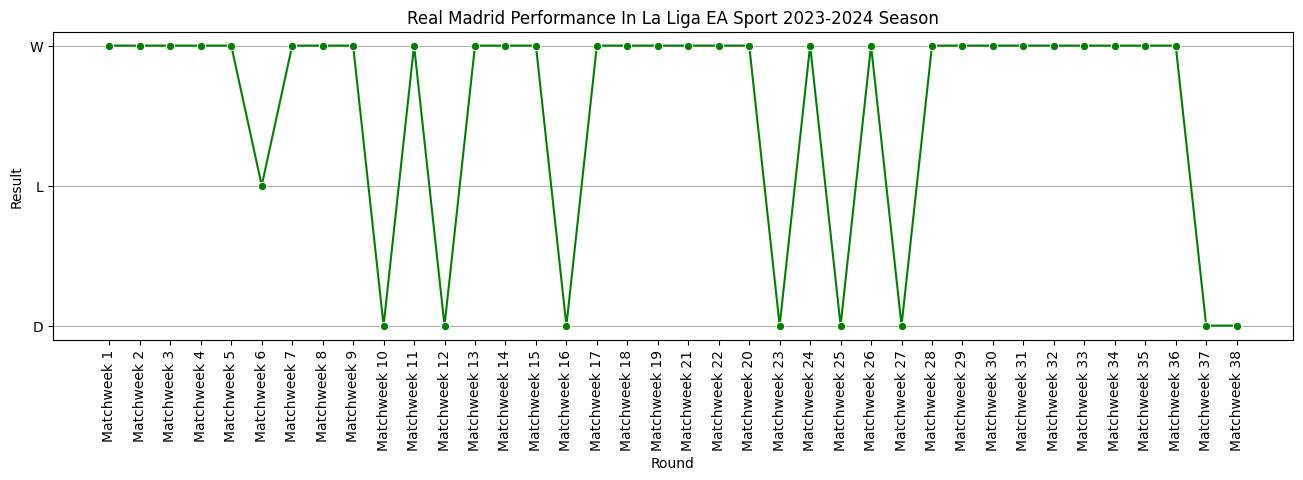

In [28]:
plt.figure(figsize=(16,4))
sns.lineplot(data=df_la_liga, x='Round', y='Result', marker='o', color='green')
plt.title('Real Madrid Performance In La Liga EA Sport 2023-2024 Season')
plt.xlabel('Round')
plt.ylabel('Result')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

- Real Madrid mengawali liga dengan rentetan 5 kemenangan beruntun
- Setelah 5 kemenangan awal, madrid sempat mengalami kekalahan di liga matchweek 6
- Real Madrid mengalami fluktuasi performa pada pertengahan musim (matchweek 7-27)
- fluktuasi performa tersebut mengindikasikan kemungkinan adanya rotasi pemain, faktor taktik dan kebugaran pemain
- Performa real madrid melonjak pada matchweek 28 hingga matchweek 36 dengan meraih 9 kemenangan beruntun
- Di 2 laga penutup la liga, real madrid meraih hasil imbang
- Hasil imbang di 2 laga penutup menunjukkan ancelotti kemungkinan melakukan rotasi pemain atau sudah mengunci gelar juara sebelum liga berakhir

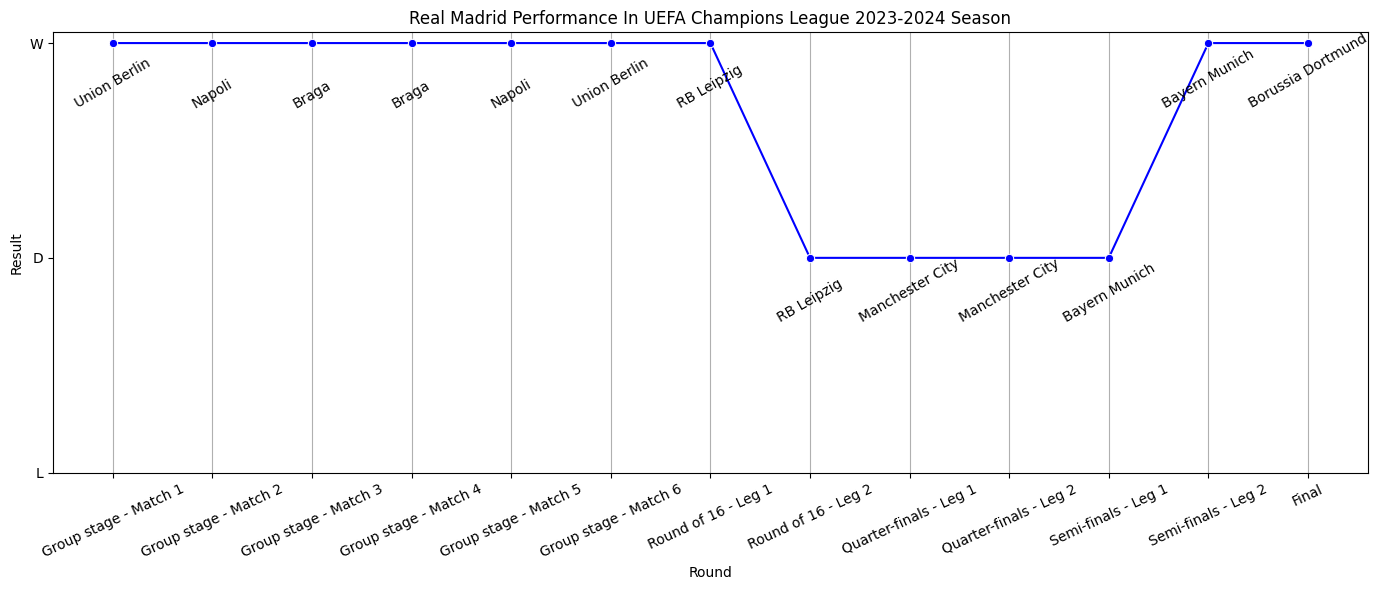

In [29]:
df_UCL = df[df['Competition'] == 'UEFA Champions League'][['Round', 'Result', 'Opponent']].reset_index(drop=True)
result_map = {'W': 2, 'D': 1, 'L': 0}
df_UCL['Result_numeric'] = df_UCL['Result'].map(result_map)

plt.figure(figsize=(14,6))
sns.lineplot(data=df_UCL, x='Round', y='Result_numeric', marker='o', color='blue')
plt.title('Real Madrid Performance In UEFA Champions League 2023-2024 Season')
plt.xlabel('Round')
plt.ylabel('Result')
plt.xticks(rotation=25)
plt.yticks([0, 1, 2], ['L', 'D', 'W'])
plt.grid(axis='x')

for i, row in df_UCL.iterrows():
    plt.text(i, row['Result_numeric'] - 0.3, row['Opponent'], ha='center', fontsize=10, rotation=30)

plt.tight_layout()
plt.show()

- Real Madrid mengawali liga champions dengan 6 kemenangan beruntun di group stage
- Hasil di group stage mengindikasikan bahwa performa real madrid di group stage sangat stabil
- Kemudian di fase gugur, madrid hanya memenangkan 1 laga dan meraih 4 kali imbang pada babak 16 besar hingga semifinal leg-1
- hasil tersebut menandakan real madrid bermain cenderung bertahan dan berhati-hati ketika memasuki fase gugur dengan lawan yang cukup kuat seperti Manchester City dan Bayern Munich
- Real madrid kembali menang di semifinal leg-2 atas Bayern Munich dan berhak melaju ke Final
- Di Final, real madrid menang atas Borussia Dortmund sehingga membuat real madrid juara Liga Champions ke-15

6. Tren Kehadiran Penonton

In [30]:
ordered_months = ['June', 'July', 'August', 'September', 'October', 'November', 'December',
                  'January', 'February', 'March', 'April', 'May']
df6 = df[df['Venue'] == 'Home'].groupby(['Month'])['Attendance2'].mean().reset_index()
df6['Month'] = pd.Categorical(df6['Month'], categories=ordered_months, ordered=True)
df6 = df6.sort_values('Month').reset_index(drop=True)
df6

,Month,Attendance2
0,September,66765.750000
1,October,70864.000000
2,November,71191.500000
3,December,70592.500000
4,January,72219.000000
5,February,76095.333333
6,March,74253.666667
7,April,77330.500000
8,May,72950.250000


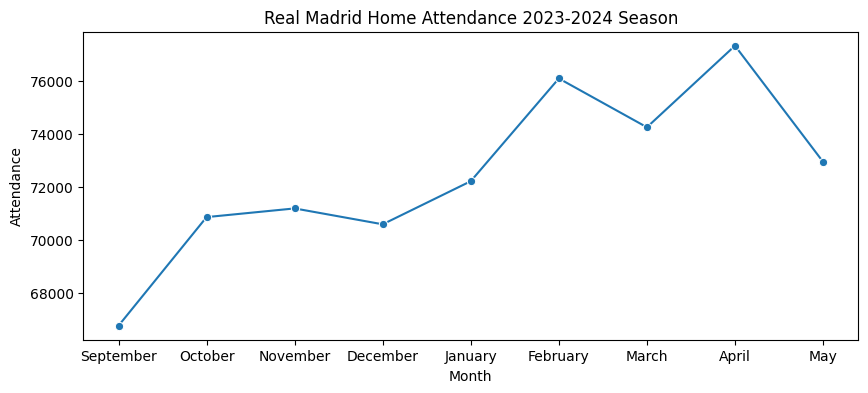

In [31]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df6, x='Month', y='Attendance2', marker='o')
plt.title('Real Madrid Home Attendance 2023-2024 Season')
plt.xlabel('Month')
plt.ylabel('Attendance')
plt.show()

- Analisis hanya menampilkan rata-rata jumlah penonton ketika real madrid bermain dikandang (Estadio Santiago Bernabeu) setiap bulannya
- Pada bulan September hingga November, rata-rata jumlah penonton yang datang ke stadion semakin meningkat. Hal ini mengindikasikan antusiasme tinggi dari penggemar apalagi jika performa tim sedang baik di awal musim
- Terjadi sedikit penurunan pada bulan desember, mengindikasikan bahwa ada kemungkinan pengaruh faktor eksternal seperti cuaca atau lawan yang dihadapi real madrid cenderung mudah
- Rata-rata jumlah penonton kembali mengalami peningkatan pada bulan Januari, ada kemungkinan saat itu laga-laga penting dimulai seperti Supercopa de Espana atau Copa Del Rey
- Puncak kehadiran penonton terjadi pada bulan Februari dan April, menandakan keterkaitan laga big match seperti Babak gugur Liga Champions kontra Manchester City dan Bayer Munich
- Kemungkinan juga terjadi big match di La Liga melawan FC Barcelona atau Atletico Madrid di Santiago Bernabeu yang menyebabkan kehadiran penonton mencapai puncaknya
- Pada bulan Mei, terjadi penurunan kehadiran penonton. kemungkinannya real madrid sudah memastikan juara liga atau kualitas lawan yang dihadapi cenderung mudah
- Rata-rata kehadiran penonton di Santiago Bernabeu mencapai 70.000

7. Kapten dengan penampilan terbanyak

In [32]:
df_captain = df['Captain'].value_counts()
df_captain

,count
Captain,
Nacho,32
Dani Carvajal,12
Luka Modric,10
Toni Kroos,1


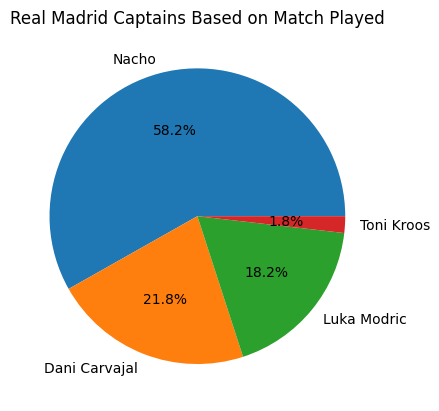

In [33]:
fig, ax = plt.subplots()
ax.pie(df_captain, labels=df_captain.index, autopct='%1.1f%%')
ax.set_title('Real Madrid Captains Based on Match Played')
plt.show()

- Nacho menjadi kapten Real Madrid yang paling sering tampil disemua kompetisi disusul Dani Carvajal dan Luka Modric
- Ini menandakan bahwa Nacho merupakan kapten utama tim dan selalu dipercayakan oleh Carlo Ancelotti
- Dani Carvajal menjadi kapten Real Madrid dengan jumlah penampilan terbanyak kedua setelah Nacho, mengindikasikan Dani Carvajal adalah Wakil kapten yang dipercayakan oleh Carlo Ancelotti ketika Nacho absen saat pertandingan
- Luka Modric dan Toni Kroos pernah menjadi kapten Real Madrid namun jumlah penampilannya cenderung sedikit. Ada kemungkinan saat itu Luka Modric, Toni Kroos, Dani Carvajal dan Nacho bermain secara bersamaan atau faktor rotasi pemain

In [34]:
# Kiprah Kapten Real Madrid berdasarkan kompetisi di musim 2023-2024
df_captain_competition = df.groupby('Competition')['Captain'].value_counts().reset_index(name='count')
df_captain_competition

,Competition,Captain,count
0,Copa del Rey,Nacho,2
1,La Liga,Nacho,17
2,La Liga,Dani Carvajal,10
3,La Liga,Luka Modric,10
4,La Liga,Toni Kroos,1
5,Supercopa de Espana,Nacho,2
6,UEFA Champions League,Nacho,11
7,UEFA Champions League,Dani Carvajal,2


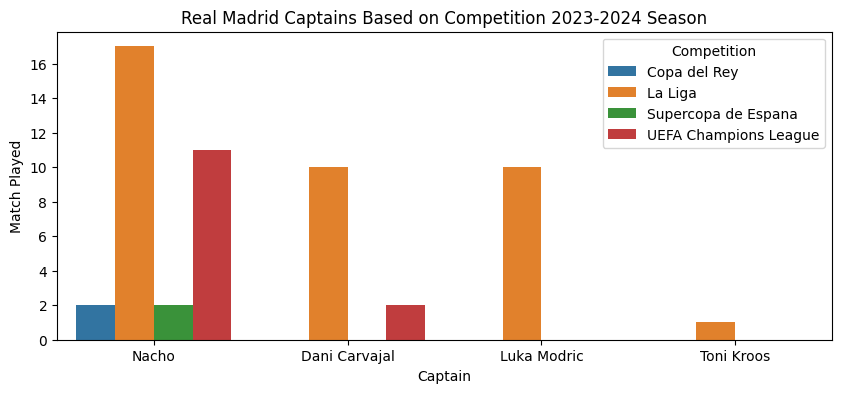

In [35]:
plt.figure(figsize=(10,4))
sns.barplot(x='Captain', y='count', hue='Competition', data=df_captain_competition)
plt.title('Real Madrid Captains Based on Competition 2023-2024 Season')
plt.xlabel('Captain')
plt.ylabel('Match Played')
plt.legend(title='Competition')

- Nacho menjadi kapten real madrid yang pernah bermain disemua kompetisi
- Dani Carvajal hanya menjadi kapten real madrid ketika bermain di La Liga atau Liga Champions ketika Nacho absen. Ada kemungkinan juga Carvajal bermain bersama dengan nacho sejak awal pertandingan pada ajang Supercopa de Espana dan Copa Del Rey
- Luka Modric hanya menjadi kapten madrid ketika bermain di La liga. Faktor rotasi pemain, absennya Carvajal, atau peran kepemimpinan yang terbatas pada pertandingan tertentu menjadi faktor yang menyebabkan hanya 10 kali menjadi kapten
- Toni kroos hanya sekali menjadi kapten real madrid saat di La Liga. Kemungkinan besar terjadi saat pemain senior lainnya absen. Untuk itu dilakukan pencarian pada laga apakah Toni Kroos yang sekali memimpin madrid sebagai kapten

In [36]:
# pencarian laga saat Toni Kroos menjadi kapten
df[df['Captain'] == 'Toni Kroos']

,Time,Competition,Round,Day,Venue,Result,GF,GA,Opponent,Possession,Attendance2,Captain,Formation,Year,Month,Month_Num,Date
53,21:00:00,La Liga,Matchweek 38,26,Home,D,0,0,Betis,60,73614,Toni Kroos,4-3-1-2,2024,May,5,2024-05-26


- Toni Kroos menjadi kapten saat melawan Betis di Liga matchweek 38 atau laga terakhir la liga
- Toni Kroos saat menjadi kapten memainkan pertandingannya di laga kandang
- Saat itu, berita mengatakan bahwa Toni Kroos akan pensiun sebagai pemain sepak bola
- Situasi tersebut menandakan bahwa Toni Kroos dipercaya menjadi kapten tim pada laga terakhirnya sebagai bentuk penghormatan dan jasanya di real madrid sekaligus menandai akhir dari eranya di real madrid

8. Rata-rata Penguasaan Bola

In [37]:
df['Possession'].groupby(df['Competition']).describe()

,count,mean,std,min,25%,50%,75%,max
Competition,,,,,,,,
Copa del Rey,2.0,68.500000,13.435029,59.0,63.75,68.5,73.25,78.0
La Liga,38.0,59.394737,8.225010,43.0,54.00,59.5,63.75,76.0
Supercopa de Espana,2.0,49.500000,9.192388,43.0,46.25,49.5,52.75,56.0
UEFA Champions League,13.0,53.153846,11.689355,33.0,48.00,52.0,58.00,75.0


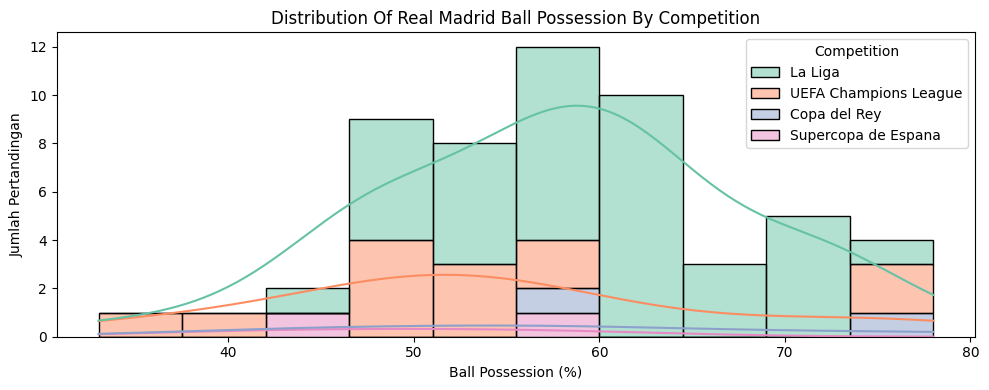

In [38]:
plt.figure(figsize=(10, 4))
sns.histplot(
    data=df,
    x='Possession',
    hue='Competition',
    kde=True,
    bins=10,
    palette='Set2',
    edgecolor='black',
    multiple='stack'
)

plt.title('Distribution Of Real Madrid Ball Possession By Competition')
plt.xlabel('Ball Possession (%)')
plt.ylabel('Jumlah Pertandingan')
plt.tight_layout()
plt.show()

- Distribusi penguasaan bola real madrid saat bermain di La Liga cenderung ke kanan yaitu berkisar antara 50-60%. Hal ini menandakan madrid memiliki kontrol penuh pertandingan dan dominan dalam penguasaan bola
- Di Liga Champions, grafik Penguasaan bola real madrid cenderung ke kiri (kisaran 40-50%). Mengindikasikan real madrid tidak selalu bermain dengan penguasaan bola melainkan ada kemungkinan bermain dengan pendekatan bertahan ketika bertemu tim tim besar
- di Supercopa de Espana dan Copa Del Rey memiliki tren penguasaan bola yang lebih variatif. Kemungkinan adanya rotasi pemain atau jumlah pertandingan yang sedikit dalam format turnamen singkat


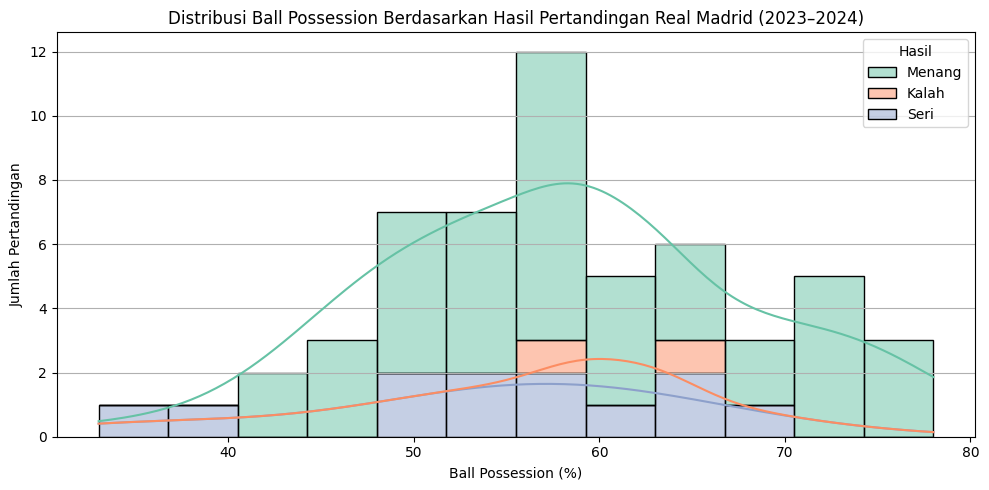

In [39]:
# Filter data yang memiliki data penguasaan bola dan hasil pertandingan
df_filtered = df.dropna(subset=["Possession", "Result"])

# Konversi hasil ke label menang/seri/kalah
result_map = {"W": "Menang", "D": "Seri", "L": "Kalah"}
df_filtered["Hasil"] = df_filtered["Result"].map(result_map)

# Plot distribusi penguasaan bola berdasarkan hasil pertandingan
plt.figure(figsize=(10, 5))
sns.histplot(data=df_filtered, x="Possession", hue="Hasil", bins=12, kde=True, palette="Set2", multiple="stack")
plt.title("Distribusi Ball Possession Berdasarkan Hasil Pertandingan Real Madrid (2023–2024)")
plt.xlabel("Ball Possession (%)")
plt.ylabel("Jumlah Pertandingan")
plt.grid(axis="y")
plt.tight_layout()
plt.show()